In [1]:
import pandas as pd
from io import StringIO
import zipfile

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

import plotly.express as px

import librosa
import librosa.display
import IPython.display as ipd

import sklearn
import warnings
warnings.filterwarnings('ignore')

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
z = zipfile.ZipFile('birdsong-recognition.zip')
train = pd.read_csv(z.open('train.csv'))
test = pd.read_csv(z.open('test.csv'))

In [3]:
print(z)

<zipfile.ZipFile filename='birdsong-recognition.zip' mode='r'>


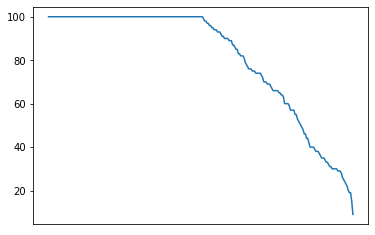

In [4]:
bird_species_count = train['species'].value_counts(ascending=False)
plt.xticks([])
_=bird_species_count.plot()

Half of the species have 100 audio samples but about a quarter have less than 50

In [5]:
train['year'] = train['date'].apply(lambda x: x.split('-')[0])
train['month'] = train['date'].apply(lambda x: x.split('-')[1])
train['month_day'] = train['date'].apply(lambda x: x.split('-')[2])

In [6]:
print('There are %s types of bird species in the training file!' %len(set((train)['species'])))

There are 264 types of bird species in the training file!


In [7]:
print(test.columns)

Index(['site', 'row_id', 'seconds', 'audio_id'], dtype='object')


# Audio capture popular years and seasons

In [8]:
train.columns

Index(['rating', 'playback_used', 'ebird_code', 'channels', 'date', 'pitch',
       'duration', 'filename', 'speed', 'species', 'number_of_notes', 'title',
       'secondary_labels', 'bird_seen', 'sci_name', 'location', 'latitude',
       'sampling_rate', 'type', 'elevation', 'description', 'bitrate_of_mp3',
       'file_type', 'volume', 'background', 'xc_id', 'url', 'country',
       'author', 'primary_label', 'longitude', 'length', 'time', 'recordist',
       'license', 'year', 'month', 'month_day'],
      dtype='object')

In [9]:
set(test['audio_id'])

{'0a997dff022e3ad9744d4e7bbf923288'}

In [10]:
test

site                                      row_id  seconds  \
0  site_1   site_1_0a997dff022e3ad9744d4e7bbf923288_5        5   
1  site_1  site_1_0a997dff022e3ad9744d4e7bbf923288_10       10   
2  site_1  site_1_0a997dff022e3ad9744d4e7bbf923288_15       15   

                           audio_id  
0  0a997dff022e3ad9744d4e7bbf923288  
1  0a997dff022e3ad9744d4e7bbf923288  
2  0a997dff022e3ad9744d4e7bbf923288

In [11]:
train.info

<bound method DataFrame.info of        rating playback_used ebird_code    channels        date          pitch  \
0         3.5            no     aldfly    1 (mono)  2013-05-25  Not specified   
1         4.0            no     aldfly  2 (stereo)  2013-05-27           both   
2         4.0            no     aldfly  2 (stereo)  2013-05-27           both   
3         3.5            no     aldfly  2 (stereo)  2013-05-27           both   
4         4.0            no     aldfly  2 (stereo)  2013-05-27           both   
...       ...           ...        ...         ...         ...            ...   
21370     4.5            no     yetvir    1 (mono)  2019-05-15           both   
21371     3.5            no     yetvir    1 (mono)  2017-05-14  Not specified   
21372     5.0            no     yetvir    1 (mono)  2017-06-10  Not specified   
21373     3.5            no     yetvir  2 (stereo)  2009-05-06          level   
21374     3.5            no     yetvir  2 (stereo)  2010-06-09          level

**38 features across 21k records**

In [12]:
year_order = sorted(list(set(train['year'])))
month_order = sorted(list(set(train['month'])))
day_order = sorted(list(set(train['month_day'])))

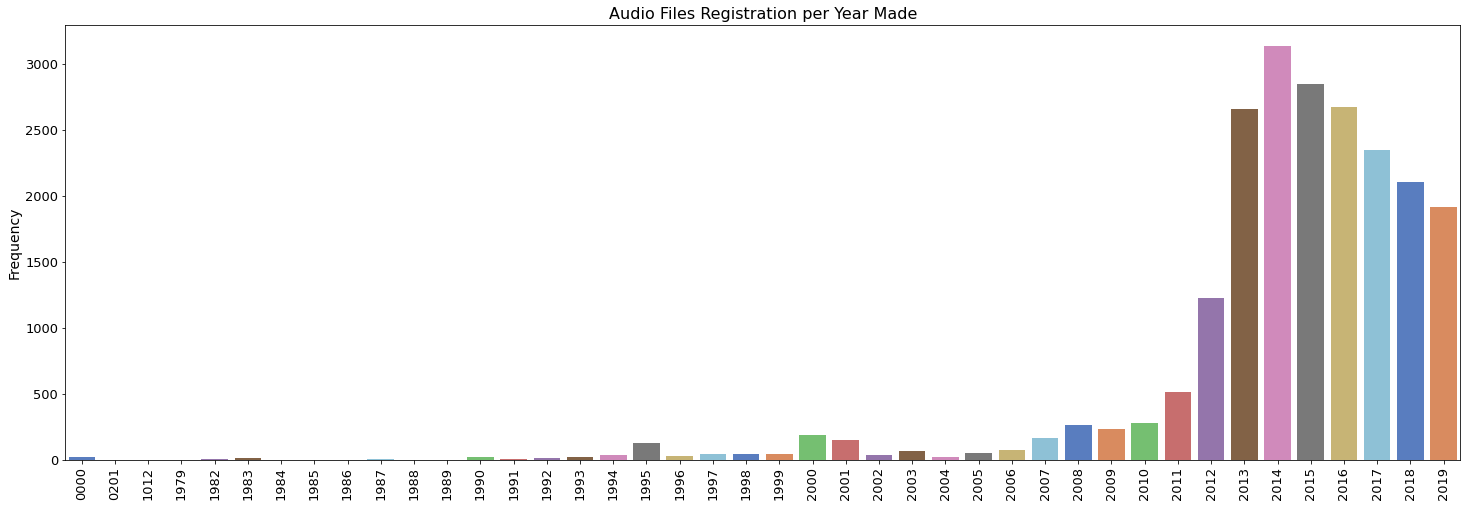

In [13]:
plt.figure(figsize=(25,8))

year_counts = sns.countplot(train['year'],palette='muted',order=year_order)
plt.title("Audio Files Registration per Year Made", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

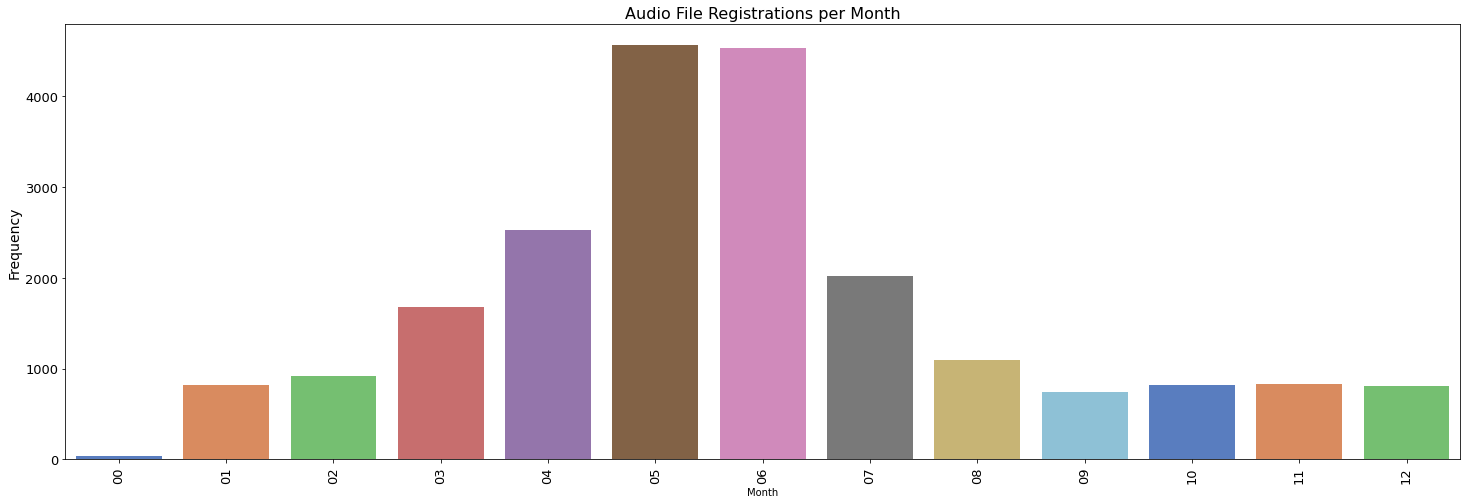

In [14]:
plt.figure(figsize=(25,8))
month_counts = sns.countplot(train['month'],palette='muted',order = month_order)
plt.title('Audio File Registrations per Month',fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Month");

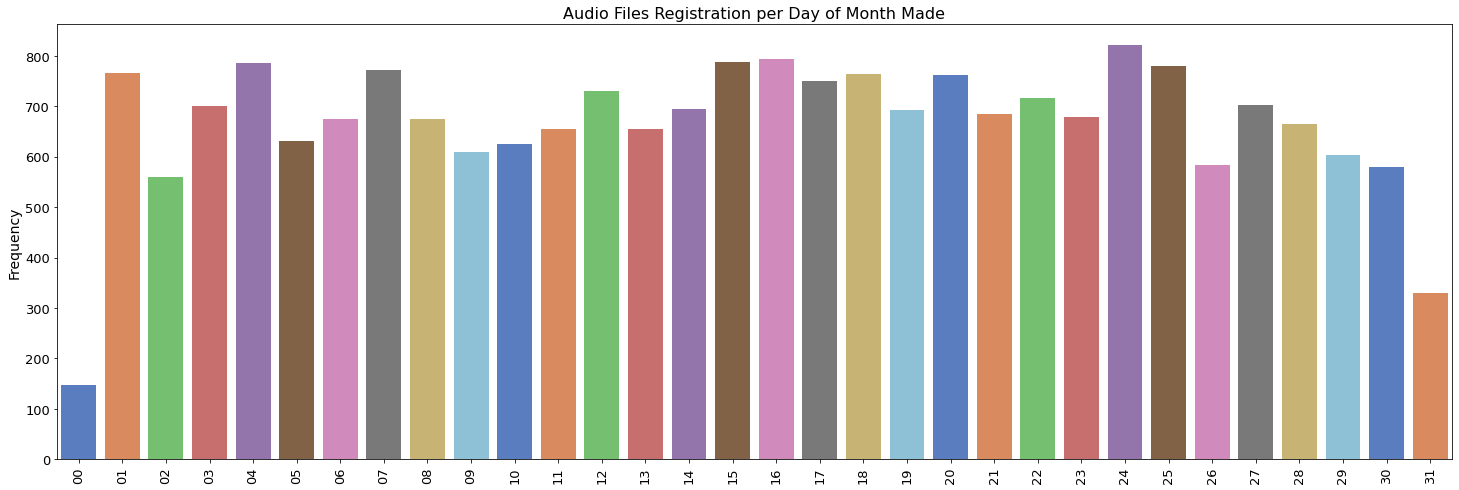

In [15]:
plt.figure(figsize=(25,8))

year_counts = sns.countplot(train['month_day'],palette='muted',order=day_order)
plt.title("Audio Files Registration per Day of Month Made", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

# Meta features

Text(0.5, 0, '')

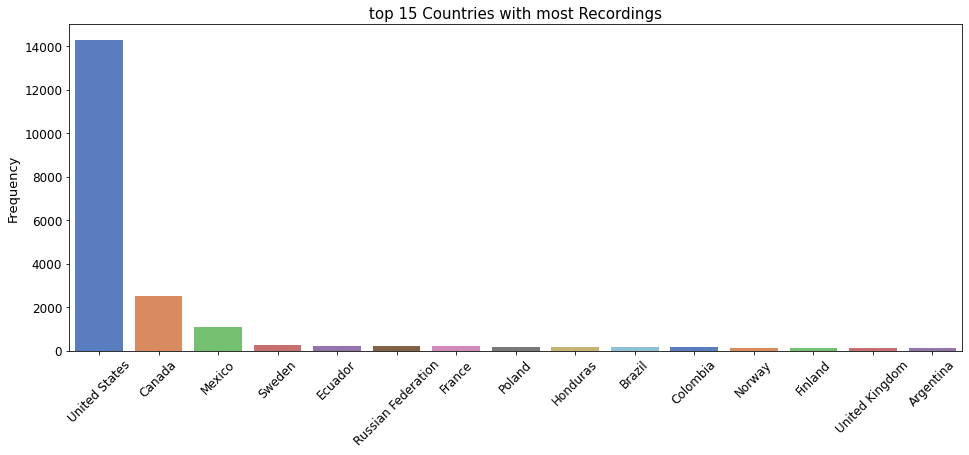

In [16]:
top_15 = list(train['country'].value_counts().head(15).reset_index()['index'])
data = train[train['country'].isin(top_15)]

plt.figure(figsize=(16,6))
ax = sns.countplot(data['country'],palette = 'muted', order = data['country'].value_counts().index)

plt.title('top 15 Countries with most Recordings', fontsize=15)
plt.ylabel('Frequency',fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(rotation=45,fontsize=12)
plt.xlabel('')

In [17]:
df = px.data.gapminder().query('year==2007')[['country','iso_alpha']]

data = pd.merge(left=train, right = df,how = 'inner',on='country')

data=data.groupby(by=['country','iso_alpha']).count()['species'].reset_index()

fig = px.choropleth(data,locations = 'iso_alpha'
                    ,color='species'
                    ,hover_name = 'country'
                    , color_continuous_scale = px.colors.sequential.Teal
                    ,title='World: Recordings Per Country')

fig.show()

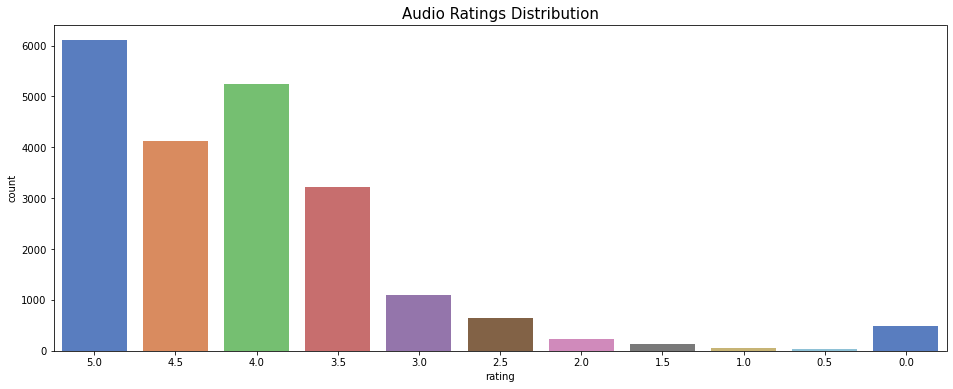

In [18]:
#quality rating for audio files

rating = list(train['rating'].value_counts().reset_index()['index'])
rating_data = train['rating']

plt.figure(figsize=(16, 6))
plt.title('Audio Ratings Distribution', fontsize=15)
ax = sns.countplot(train['rating'], palette="muted", order = rating_data.value_counts().index.sort_values(ascending=False))

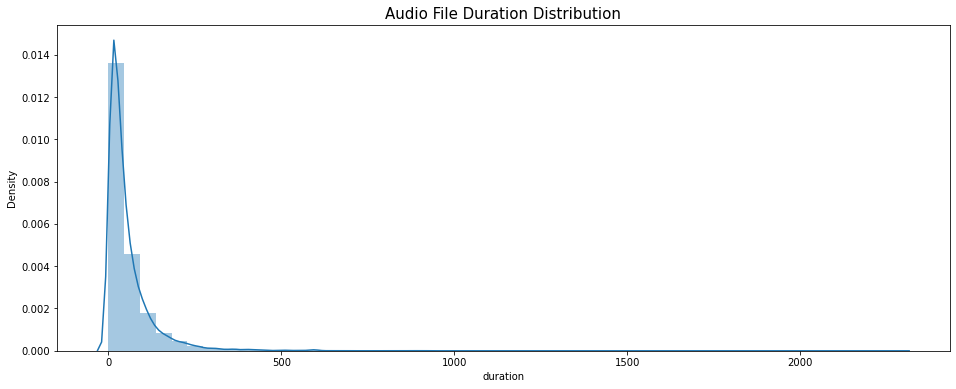

In [19]:
#distribution of audio duration

plt.figure(figsize=(16, 6))
plt.title('Audio File Duration Distribution', fontsize=15)
duration = sns.distplot(train['duration'])

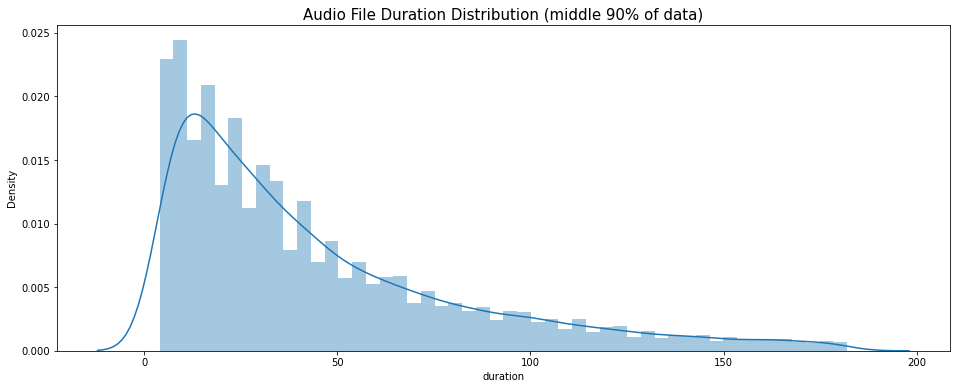

In [20]:
duration_adjusted = train['duration'][train['duration'].between(train['duration'].quantile(.05), train['duration'].quantile(.95))] 
plt.figure(figsize=(16, 6))
plt.title('Audio File Duration Distribution (middle 90% of data)',fontsize=15)
duration = sns.distplot(duration_adjusted)

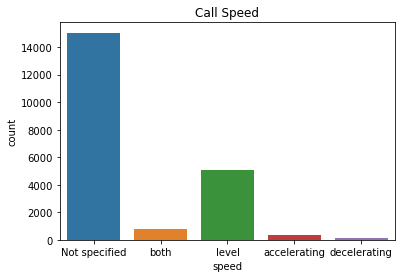

In [21]:
plt.title('Call Speed')
speed = sns.countplot(train['speed'])

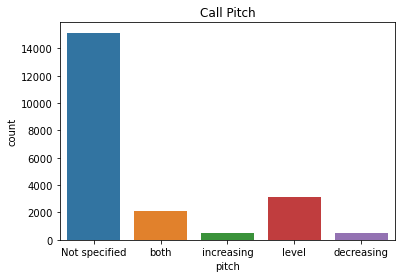

In [22]:
plt.title('Call Pitch')
pitch  = sns.countplot(train['pitch'])

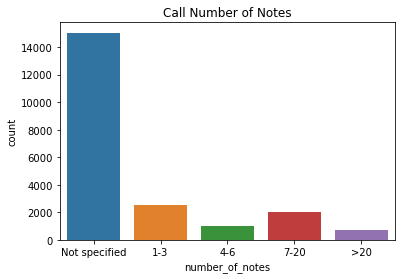

In [23]:
plt.title('Call Number of Notes')
num_notes = sns.countplot(train['number_of_notes'])

# Accessing audio files

In [24]:
#z = zipfile.ZipFile('birdsong-recognition.zip')

In [44]:
files = ('\\train_audio'+ '\\' + 
           train['ebird_code']+ '\\' + 
           train['filename'])
files_samp = files.sample(5,ran)
type(files_samp)

pandas.core.series.Series

In [45]:
os.chdir('C:\\Users\\jonat\\Desktop\\Career\\Springboard\\Capstone 3\\birdsong-recognition')

'C:\\Users\\jonat\\Desktop\\Career\\Springboard\\Capstone 3'

In [68]:
files = os.getcwd()+files_samp

In [70]:
for file in files:
    print(file)

C:\Users\jonat\Desktop\Career\Springboard\Capstone 3\birdsong-recognition\train_audio\buggna\XC180259.mp3
C:\Users\jonat\Desktop\Career\Springboard\Capstone 3\birdsong-recognition\train_audio\wlswar\XC390109.mp3
C:\Users\jonat\Desktop\Career\Springboard\Capstone 3\birdsong-recognition\train_audio\foxspa\XC155891.mp3
C:\Users\jonat\Desktop\Career\Springboard\Capstone 3\birdsong-recognition\train_audio\chukar\XC408258.mp3
C:\Users\jonat\Desktop\Career\Springboard\Capstone 3\birdsong-recognition\train_audio\gnwtea\XC110332.mp3


In [76]:
# buggna audio sample
ipd.Audio(files.iloc[0])

In [77]:
# wlswar audio sample
ipd.Audio(files.iloc[1])

In [78]:
# foxspa audio sample
ipd.Audio(files.iloc[2])